# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
-0.002
-0.002
-0.002
-0.002
-0.003
0.0
-0.003
-0.003
-0.002
0.98
0.979
0.978
0.978
1.959
1.961
1.962
1.962
1.961
2.953
2.955
2.957
2.957
2.956
3.941
3.94
3.94
3.94
4.935
4.935
4.934
4.933
5.926
5.928
5.931
5.93
5.93
6.704
6.704
6.702
6.702
7.48
7.48
7.48
7.48
8.456
8.459
8.461
8.46
8.46
9.453
9.455
9.458
9.457
9.456
10.438
10.439
10.442
10.44
10.44
10.44
11.431
11.432
11.43
11.431
12.435
12.435
12.434
12.434
13.439
13.439
13.439
14.139
14.142
14.144
14.142
14.144
14.845
14.849
14.85
14.85
14.85
15.852
15.852
15.852
15.852
16.849
16.849
16.848
16.847
17.841
17.841
17.839
17.84
18.838
18.838
18.838
18.838
19.834
19.834
19.833
19.833
20.832
20.832
20.831
21.329
21.329
21.329
21.844
21.843
21.842
21.841
22.841
22.842
22.841
22.84
23.847
23.846
23.845
23.845
24.829
24.829
24.827
2

57.944
57.943
57.943
57.941
57.941
57.941
57.94
57.94
57.94
57.94
57.94
57.94
57.941
57.941
57.94
57.939
57.938
57.938
57.938
57.966
58.001
58.038
58.038
58.037
58.037
58.036
58.035
58.056
58.056
58.056
58.055
58.054
58.054
58.054
58.054
58.054
58.053
58.052
58.054
58.053
58.053
58.053
58.053
58.051
58.049
58.049
58.05
58.05
58.05
58.049
58.049
58.05
58.05
58.05
58.048
58.048
58.048
58.048
58.048
58.048
58.048
58.048
58.048
58.048
58.048
58.048
58.046
58.046
58.046
58.047
58.045
58.077
58.113
58.151
58.15
58.15
58.148
58.148
58.172
58.172
58.172
58.172
58.173
58.173
58.172
58.172
58.172
58.172
58.171
58.171
58.174
58.173
58.171
58.171
58.17
58.17
58.169
58.169
58.169
58.169
58.169
58.169
58.169
58.168
58.168
58.168
58.168
58.168
58.167
58.166
58.166
58.166
58.166
58.166
58.166
58.165
58.165
58.165
58.165
58.165
58.165
58.164
58.163
58.163
58.163
58.163
58.195
58.232
58.267
58.304
58.339
58.339
58.338
58.338
58.357
58.357
58.357
58.357
58.356
58.356
58.356
58.356
58.356
58.356
58.356
58

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1553,3106,60.163
1554,3108,60.163
1555,3110,60.163
1556,3112,60.163


<IPython.core.display.Javascript object>


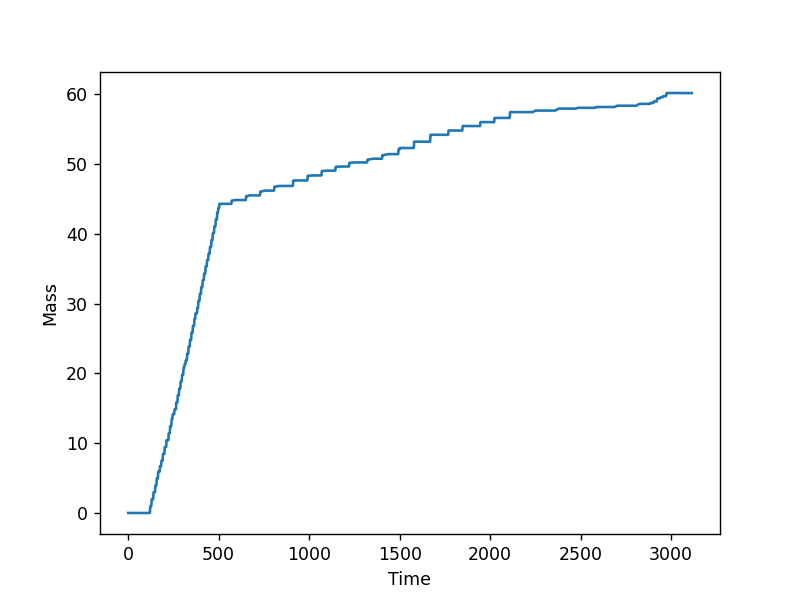

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_280223_S121-126.csv')